# Parsing Dates
In this notebook, I work on datetime type of data, correct them in right format. Learn more in this [tutorial](https://www.kaggle.com/alexisbcook/parsing-dates)

* Dataset: Significant Earthquakes, 1965-2016. Source: [Kaggle](https://www.kaggle.com/usgs/earthquake-database)
* Context: The National Earthquake Information Center (NEIC) determines the location and size of all significant earthquakes that occur worldwide and disseminates this information immediately to national and international agencies, scientists, critical facilities, and the general public. The NEIC compiles and provides to scientists and to the public an extensive seismic database that serves as a foundation for scientific research through the operation of modern digital national and global seismograph networks and cooperative international agreements. The NEIC is the national data center and archive for earthquake information.
* Content: This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965.

I downloaded data file from above link, and save it in folder named 'data' in this repo.

In [1]:
# Load needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import sys

In [5]:
#load data
filepath = sys.path[0] + '/data/earthquakes.csv'
df_earthquakes = pd.read_csv(filepath)
df_earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [6]:
df_earthquakes.shape

(23412, 21)

In [3]:
df_earthquakes.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

This data set contains a lot of missing values, however, today I just focus on column with datetime datatype. So let's take a look at the column Date

In [12]:
# print some rows of date and time
df_earthquakes[['Date','Time']].head(10)

,Date,Time
0,01/02/1965,13:44:18
1,01/04/1965,11:29:49
2,01/05/1965,18:05:58
3,01/08/1965,18:49:43
4,01/09/1965,13:32:50
5,01/10/1965,13:36:32
6,01/12/1965,13:32:25
7,01/15/1965,23:17:42
8,01/16/1965,11:32:37
9,01/17/1965,10:43:17


So in this earthquakes dataset, the values in Date column have format 'MM/DD/YYYY'. Time is HH:MM:SS with hour is from 00 to 24. 

In [16]:
# Let's see how Python understands the type of Date column
df_earthquakes[['Date']].dtypes

Date    object
dtype: object

I can see that it says that the data type of Date column is "object". Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it. Pandas also has a specific datetime64 dtypes. Because the dtype of Date column is object rather than datetime64, it means that Python doesn't know that this column contains dates.

## Convert date columns to datetime
Date format in Pandas: %d for day, %m for month, %y for a two-digit year and %Y for a four digit year. 

For example: 
* 1/17/07 has the format "%m/%d/%y"
* 17-1-2007 has the format "%d-%m-%Y"

I will check the length of Date column. len('17-1-2007') = 9 or len('17-01-2007')=10

In [18]:
date_lengths = df_earthquakes['Date'].str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

So there are 3 rows with len() is 24. This is not correct. So I need to check these 3 rows 

In [19]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
df_earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


So rows with index number are 3378, 7512, 20650 have values in a different format. Because there are only 3 rows so I will correct them manually  

In [20]:
df_earthquakes.loc[3378,'Date'] = '02/23/1975'
df_earthquakes.loc[3378,'Time'] = '02:58:41'

df_earthquakes.loc[7512,'Date'] = '04/28/1985'
df_earthquakes.loc[7512,'Time'] = '02:53:41'

df_earthquakes.loc[20650,'Date'] = '03/13/2011'
df_earthquakes.loc[20650,'Time'] = '02:23:34' 

In [22]:
#Check data again 
df_earthquakes.loc[indices]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
3378,02/23/1975,02:58:41,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed,1975-02-23
7512,04/28/1985,02:53:41,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed,1985-04-28
20650,03/13/2011,02:23:34,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed,2011-03-13


In [21]:
#create a new column, date_parsed, with the parsed dates
df_earthquakes['date_parsed'] = pd.to_datetime(df_earthquakes['Date'], format='%m/%d/%Y')
df_earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09


In [25]:
#What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:
df_earthquakes['date_parsed'] = pd.to_datetime(df_earthquakes['Date'], infer_datetime_format=True)

#Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

## Select day, month, year of date column

In [27]:
# day of month
day_of_month_earthquakes = df_earthquakes['date_parsed'].dt.day
day_of_month_earthquakes.head()

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int64

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 

<AxesSubplot:xlabel='date_parsed', ylabel='Count'>

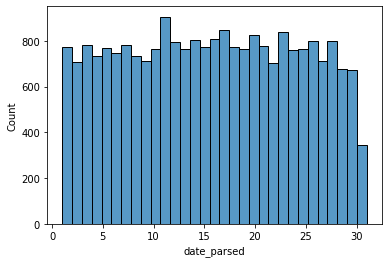

In [29]:
sns.histplot(day_of_month_earthquakes, kde=False, bins=31)

In [30]:
#month of year
month_of_year_earthquakes = df_earthquakes['date_parsed'].dt.month
month_of_year_earthquakes.head()

0    1
1    1
2    1
3    1
4    1
Name: date_parsed, dtype: int64

<AxesSubplot:xlabel='date_parsed', ylabel='Count'>

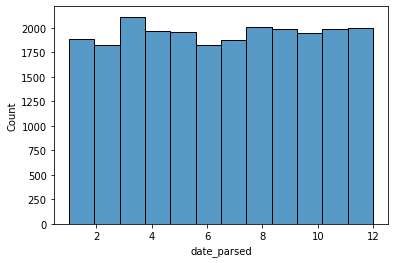

In [31]:
sns.histplot(month_of_year_earthquakes, kde=False, bins=12)

In [32]:
year_earthquakes = df_earthquakes['date_parsed'].dt.year
year_earthquakes.head()

0    1965
1    1965
2    1965
3    1965
4    1965
Name: date_parsed, dtype: int64

<AxesSubplot:xlabel='date_parsed', ylabel='Count'>

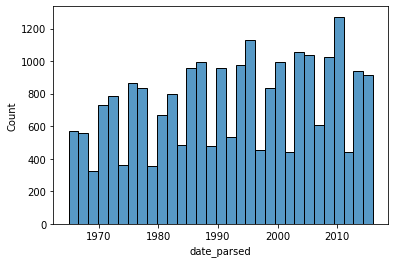

In [33]:
sns.histplot(year_earthquakes, kde=False)